# Part 1: Data Description

In [1]:
# Set up
library(tidyverse)
library(repr)
library(tidymodels)
source("cleanup.R")

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
# Load Data
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
print(players)
unique_experiences_vector <- players |>
    pull(experience) |>
    unique()
print(unique_experiences_vector)

unique_gender_vector <- players |>
    pull(gender) |>
    unique()
print(unique_gender_vector)
summary(players)

# A tibble: 196 × 7
   experience subscribe hashedEmail              played_hours name  gender   Age
   <chr>      <lgl>     <chr>                           <dbl> <chr> <chr>  <dbl>
 1 Pro        TRUE      f6daba428a5e19a3d475748…         30.3 Morg… Male       9
 2 Veteran    TRUE      f3c813577c458ba0dfef809…          3.8 Chri… Male      17
 3 Veteran    FALSE     b674dd7ee0d24096d1c0196…          0   Blake Male      17
 4 Amateur    TRUE      23fe711e0e3b77f1da7aa22…          0.7 Flora Female    21
 5 Regular    TRUE      7dc01f10bf20671ecfccdac…          0.1 Kylie Male      21
 6 Amateur    TRUE      f58aad5996a435f16b0284a…          0   Adri… Female    17
 7 Regular    TRUE      8e594b8953193b26f498db9…          0   Luna  Female    19
 8 Amateur    FALSE     1d2371d8a35c8831034b25b…          0   Emer… Male      21
 9 Amateur    TRUE      8b71f4d66a38389b7528bb3…          0.1 Nata… Male      47
10 Veteran    TRUE      bbe2d83de678f519c4b3daa…          0   Nyla  Female    22
# ℹ 186 

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 9.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :21.14  
                                       3rd Qu.:22.75  
                                       Max.   :58.00  
                               

## Part 1: Data Description (players.csv)

This report analyzes the `players.csv` dataset, which contains information about video game players.

### 1.1 Data Source and Collection

The `players.csv` dataset was provided as part of the DSCI 100 course materials. It is collected by a research group in Computer Science at UBC investigating how people play video games.

### 1.2 Data Structure

The dataset is a single table containing **196 observations** (rows) and **7 variables** (columns). Each row corresponds to a single player.

### 1.3 Variable Summary

The following table summarizes all variables in the dataset:

| Variable Name | Data Type | Description |
| :--- | :--- | :--- |
| `Experience` | `chr` | Player's self-reported experience level (Categorical: "Pro", "Veteran", "Amateur", "Regular", "Beginner") |
| `Subscribe` | `logi` | Whether the player is subscribed (Boolean: `TRUE` / `FALSE`) |
| `hashedEmail` | `chr` | A hashed email address for the player (Identifier) |
| `played_hours` | `num` | Total hours played by the player (Numeric) |
| `name` | `chr` | The player's name or username (Identifier) |
| `gender` | `chr` | The player's self-reported gender (Categorical: "Male", "Female", "Non-binary", "Prefer not to say" "Agender", "Two-Spirited") |
| `age` | `num` | The player's age in years (Numeric) |

### 1.4 Summary Statistics

The table below provides summary statistics for the quantitative variables in the dataset:

| Variable | Min | 1st Qu. | Median | Mean | 3rd Qu. | Max |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| `played_hours` | 0.00 | 0.00 | 0.10 | 5.85 | 0.60 | 223.10 |
| `age` | 9.00 | 17.00 | 19.00 | 21.14 | 22.75 | 58.00 |

*Note: The mean for `age` was calculated after ignoring 2 missing values.*

### 1.5 Data Issues and Limitations

Based on the initial exploration, the following issues and potential limitations have been identified:

**Observed Issues:**
 - Missing Values: The `age` variable contains 2 `NA` values. These will need to be handled (e.g., removed or imputed) before modeling.
 - Irrelevant Variables The `hashedEmail` and `name` variables are identifiers. They hold no predictive value and should be removed to protect privacy and prevent model issues.
 - Data Types: The `Experience` and `gender` variables are stored as character (`chr`) types. They will need to be converted to factors (`factor`) before being used in most R models.
 - Skewed Data: The `played_hours` variable appears highly skewed. The mean (5.85) is much larger than the median (0.10), and the max value (223.10) is far from the 3rd quartile (0.60).

**Potential Limitations (not directly visible):
- Self-Reported Data: Variables like `Experience` and `gender` are likely self-reported, which could introduce bias or inaccuracies.

In [4]:
print(sessions)
summary(sessions)

# A tibble: 1,535 × 5
   hashedEmail         start_time end_time original_start_time original_end_time
   <chr>               <chr>      <chr>                  <dbl>             <dbl>
 1 bfce39c89d6549f2bb… 30/06/202… 30/06/2…       1719770000000     1719770000000
 2 36d9cbb4c6bc0c1a69… 17/06/202… 17/06/2…       1718670000000     1718670000000
 3 f8f5477f5a2e53616a… 25/07/202… 25/07/2…       1721930000000     1721930000000
 4 bfce39c89d6549f2bb… 25/07/202… 25/07/2…       1721880000000     1721880000000
 5 36d9cbb4c6bc0c1a69… 25/05/202… 25/05/2…       1716650000000     1716650000000
 6 bfce39c89d6549f2bb… 23/06/202… 23/06/2…       1719160000000     1719160000000
 7 fd6563a4e0f6f42735… 15/04/202… 15/04/2…       1713170000000     1713170000000
 8 ad6390295640af1ed0… 21/09/202… 21/09/2…       1726880000000     1726890000000
 9 96e190b0bf3923cd8d… 21/06/202… 21/06/2…       1718940000000     1718940000000
10 36d9cbb4c6bc0c1a69… 16/05/202… 16/05/2…       1715840000000     1715840000000
# ℹ 1,

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

## Part 1: Data Description (sessions.csv)


### 1.1 Data Source and Collection

Collected by the same group as the group that collected `players.csv`. This data is linked to the `players.csv` file via the `hashedEmail` variable."

### 1.2 Data Structure

The dataset is a single table containing **1,535 observations** (rows) and **5 variables** (columns). Each row corresponds to a single play session.

### 1.3 Variable Summary

The following table summarizes all variables in the dataset:

| Variable Name | Data Type | Description |
| :--- | :--- | :--- |
| `hashedEmail` | `chr` | A hashed email address for the player (Identifier, links to `players.csv`) |
| `start_time` | `chr` | The session start time, formatted as a character string (e.g., "30/06/202...") |
| `end_time` | `chr` | The session end time, formatted as a character string (e.g., "30/06/202...") |
| `original_start_time` | `num` | The session start time as a numeric timestamp (likely Unix time in milliseconds) |
| `original_end_time` | `num` | The session end time as a numeric timestamp (likely Unix time in milliseconds) |

### 1.4 Summary Statistics

The table below provides summary statistics for the quantitative variables in the dataset.

| Variable | Min | 1st Qu. | Median | Mean | 3rd Qu. | Max |
| :--- | :--- | :--- | :--- | :--- | :--- | :--- |
| `original_start_time` | `1.712e+12` | `1.716e+12` | `1.719e+12` | `1.719e+12` | `1.722e+12` | `1.727e+12` |
| `original_end_time` | `1.712e+12` | `1.716e+12` | `1.719e+12` | `1.719e+12` | `1.722e+12` | `1.727e+12` |

*Note: The statistics for `original_end_time` were calculated after ignoring 2 missing values.*

### 1.5 Data Issues and Limitations

Based on the initial exploration, the following issues and potential limitations have been identified:

**Observed Issues:**
- Missing Values: The `original_end_time` variable contains 2 `NA` (missing) values. These rows will likely need to be removed as we cannot calculate session duration.
- Incorrect Data Types: The `start_time` and `end_time` variables are stored as character strings (`chr`) instead of proper `datetime` objects. They will need to be parsed and converted to be useful for calculating session lengths.
- Redundant Information: The dataset contains two sets of timestamps: one set as character strings (`start_time`, `end_time`) and one as numeric values (`original_start_time`, `original_end_time`). It will be necessary to check if these columns contain identical information after conversion. The numeric columns are more likely to be used for calculations.
- Irrelevant Variables: The `hashedEmail` variable is an identifier. While crucial for joining with `players.csv`, it should not be used as a predictive feature in a model.

Potential Limitations:
- Timestamp-Only Data: This dataset only contains session start and end times. It provides no information about *what* the player did during that session, limiting the scope of questions we can answer.
- It is unclear how a "session" is defined. For example, does a 5-second disconnect and reconnect count as a new session? This could impact calculations of "total time played."

# Part 2: Questions


### 2.1 Broad Question

We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

### 2.2 Specific Question

**Specific Question:** Can a player's **age** be used to predict the **total amount of time** a player spends on the game?

### 2.3 Addressing the Question with Data

We will use the **`players.csv`** dataset to answer this question.

* The **explanatory variable** will be `age`, a numeric variable from `players.csv`.
* The **response variable** will be `played_hours`, a numeric variable from `players.csv` that represents the total time a player has spent in the game.

### 2.4 Data Wrangling Plan

To prepare the data for analysis, we will use the `players.csv` data. The `sessions.csv` data is not required for this specific question, as `played_hours` is already a pre-aggregated total.

The minimal wrangling steps are:

1.  **Select Variables:** We will select the `age` and `played_hours` columns from the `players.csv` data.
2.  **Handle Missing Values:** The `age` variable has two `NA` (missing) values. Since our explanatory variable cannot be missing, we will remove these two rows from the dataset for this analysis.
3.  As noted in Part 1, `played_hours` is highly right-skewed. Our exploratory data analysis will investigate this skew (e.g., with a histogram) to determine if a transformation is necessary for modeling.

# Part 3: Exploratory Data Analysis and Visualization

### 3.1 Data Loading and Wrangling

The `players.csv` and `sessions.csv` datasets were loaded. The `players.csv` data, which is the focus of our question, is in a tidy format where each row represents one player.

The only minimal wrangling required for this exploratory step is to handle the 2 `NA` values in the `Age` column, which will be filtered out before visualization and analysis.

### 3.2 Mean Values for Quantitative Variables

As required, the mean values for the quantitative variables in the `players.csv` dataset are reported below.

| Variable | Mean Value |
| :--- | :--- |
| `played_hours` | 5.85 |
| `Age` | 21.14 |

*Note: The mean for `Age` was calculated after removing 2 `NA` values.*

### Exploratory Visualizations

Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


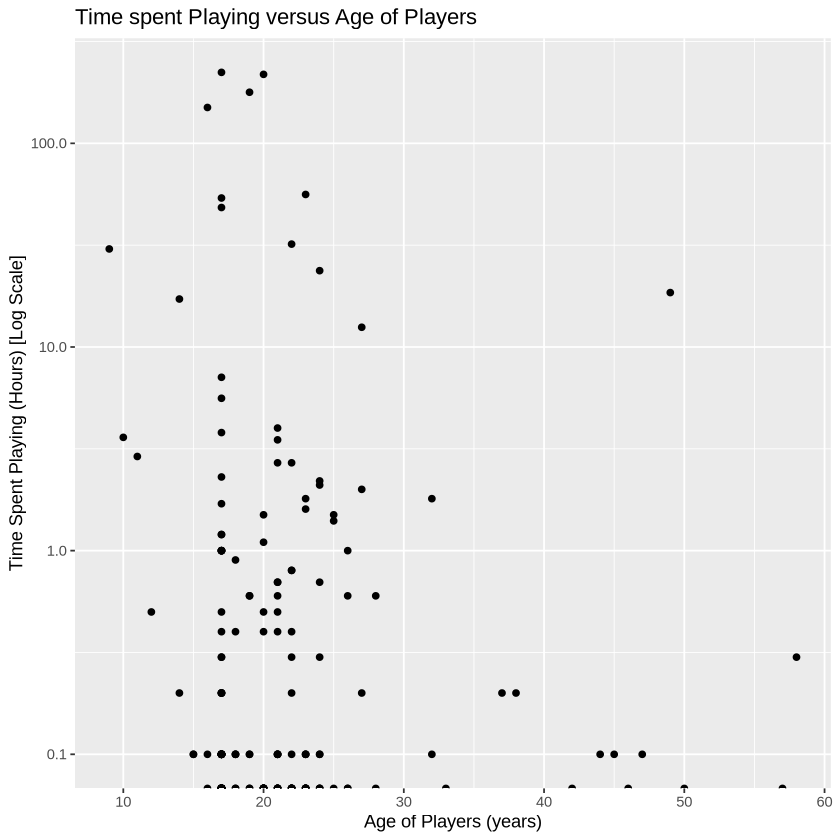

In [25]:
hours_vs_age <- ggplot(players, aes(x=Age, y=played_hours)) +
    geom_point() +
    scale_y_log10() +
    xlab("Age of Players (years)")+
    ylab("Time Spent Playing (Hours) [Log Scale]") +
    ggtitle("Time spent Playing versus Age of Players")	

hours_vs_age

Insights:
-This scatter plot visualizes the relationship between our explanatory variable (`Age`) and our response variable (`played_hours`).
- Due to the skew in `played_hours`, a log scale was applied to the y-axis to make the relationship easier to see.
- The plot shows a **weak negative relationship** between age and time spent playing. While there is a lot of variance, the general trend suggests that older players tend to play slightly fewer hours, but this relationship does not appear to be strong. `Age` by itself is unlikely to be a highly accurate predictor of `played_hours`.

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


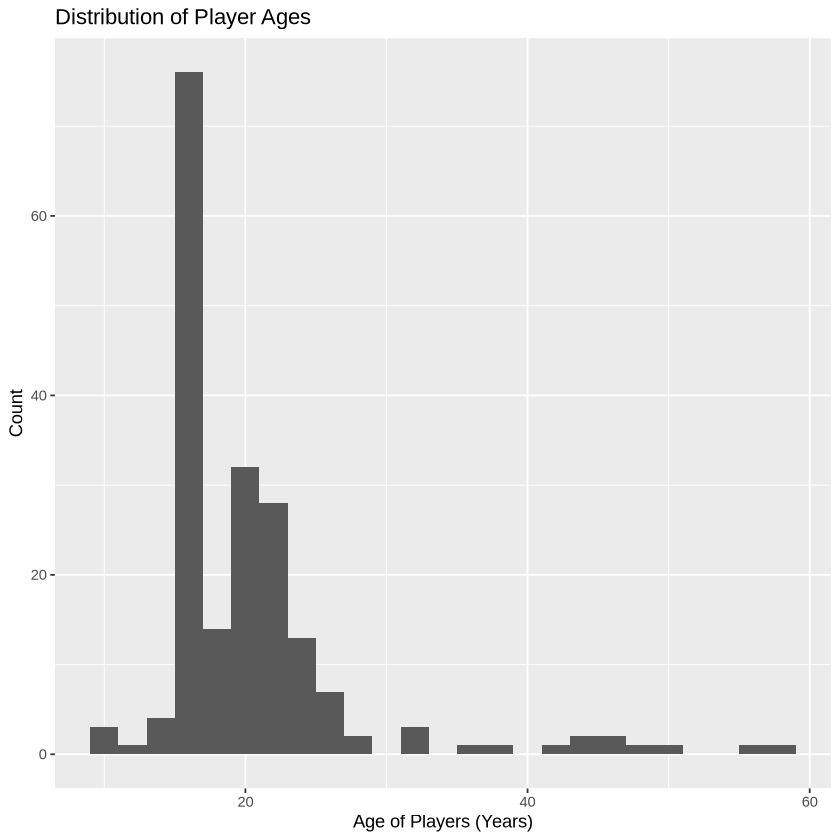

In [29]:
age_histogram <- ggplot(players, aes(x=Age)) +
    geom_histogram(binwidth=2) +
    xlab("Age of Players (Years)") +
    ylab("Count") +
    ggtitle("Distribution of Player Ages")

age_histogram

Insights:
- This histogram reveals that the distribution of `Age` is **right-skewed**. The majority of players are concentrated in their late teens and early twenties (approx. 17-25 years). There is a long tail of fewer, older players, with the oldest player being 58. This tells us our player base is predominantly young.

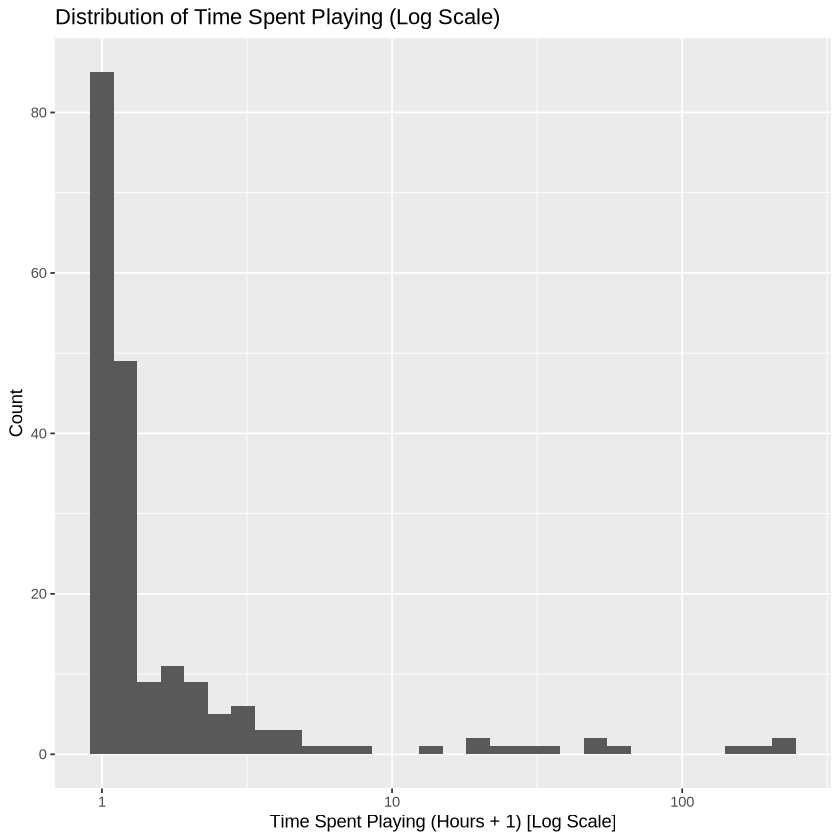

In [30]:
time_histogram <- ggplot(players, aes(x = played_hours + 1)) +
  geom_histogram(bins = 30) +
  scale_x_log10() + 
  xlab("Time Spent Playing (Hours + 1) [Log Scale]") +
  ylab("Count") +
  ggtitle("Distribution of Time Spent Playing (Log Scale)")

time_histogram

Insights:
- The `played_hours` variable is **extremely right-skewed**. The initial summary statistics (Mean: 5.85, Median: 0.10) confirmed this.
- The skew was so significant that a standard histogram was unreadable, with almost all data points in a single bin.
-  log-plus-one transformation (`log10(played_hours + 1)`) was applied to the x-axis to visualize the distribution. This plot shows a large group of players with zero or near-zero hours (the peak at the far left) and another, more spread-out group of players with varying levels of engagement.

## Part 4: Methods and Plan

To address our specific question ("Can a player's `age` be used to predict the total amount of time a player spends on the game?"), we will use a **K-Nearest Neighbors (KNN) regression** model.

### 4.1 Why is this method appropriate?

This is a regression problem because our response variable (`played_hours`) is quantitative.

The K-Nearest Neighbors method is non-parametric, meaning it does not assume a specific underlying relationship (like a straight line) between the variables. Our exploratory analysis in Part 3 showed a weak, potentially non-linear relationship between `age` and `played_hours`. A flexible model like KNN, which makes predictions based on neighboring data points, is more appropriate than a rigid linear model.

### 4.2 Which assumptions are required, if any?

KNN is largely assumption-free. It does not require variables to be normally distributed or have constant variance (homoscedasticity).

The method's primary "assumption" is that **distance is meaningful**: points that are "near" in the predictor space (i.e., players of a similar `age`) should have similar response values (similar `played_hours`).

The main sensitivity is to the scale of predictors. Since we are only using one predictor (`age`), we do not need to scale it. If we added other predictors (e.g., a categorical variable like `Experience`), we would first need to normalize all predictors to the same scale.

### 4.3 What are the potential limitations or weaknesses?

1.  **Sensitivity to `k`:** The model's performance is highly dependent on the choice of `k` (the number of neighbors). A small `k` can lead to overfitting (high variance), while a large `k` can lead to underfitting (high bias). We will address this using cross-validation.
2.  **Inability to Extrapolate:** KNN predicts by averaging the values of its neighbors. It can never predict a `played_hours` value that is higher than the maximum or lower than the minimum `played_hours` of its neighbors in the training set.

### 4.4 How are you going to compare and select the model?

Our model has one main hyperparameter: `k`. We will select the optimal `k` using the following procedure:

1.  We will use **10-fold cross-validation** on our training dataset.
2.  We will test a range of `k` values (e.g., from `k=1` to `k=50`).
3.  For each `k`, the average **Root Mean Squared Error (RMSE)** across all 10 folds will be calculated.
4.  The "best" model will be the one with the `k` value that minimizes the average RMSE.

### 4.5 How are you going to process the data to apply the model?


1.  We will first split our NA-filtered dataset (194 observations) into a **training set (80%)** and a **test set (20%)**. The test set will not be touched until the final evaluation.
2.  As identified in Part 3, the `played_hours` variable is extremely right-skewed with many zero values. To handle this, we will apply a **log-plus-one transformation** ($y' = \log(y+1)$) to the `played_hours` variable.
3. The KNN model will be trained on the training set to predict this *transformed* value ($y'$). All cross-validation and tuning will also be done on these transformed values.
4. To decide on the best hyperparameter $k$, we will use 10-fold cross-validation.
5. To evaluate our final, tuned model on the test set, we will:
    * Predict the transformed values ($y'_{pred}$).
    * **Invert the transformation** ($y_{pred} = \exp(y'_{pred}) - 1$) to get the prediction in the original units (hours).
    * Calculate the final test RMSE using these untransformed `hours` predictions and the actual `hours` from the test set. This gives us an interpretable measure of our model's real-world error.